# EXPLORATORY DATA ANALYSIS OF A SPOTIFY USER

Spotify is one of the most used platforms for streaming music and podcasts in today's age. It is a a freemium service, the basic features being free with advertisements and limited control, while the paid subscription  has offline listening, ad-free.[wikipedia](https://en.wikipedia.org/wiki/Spotify)

In this dataset, we take a look at a user's history of their spotify account. Through EDA, we hope to identify the user's listening behaviour.

## Data Understanding

The data was taken from [kaggle](https://www.kaggle.com/datasets/anandshaw2001/top-spotify-songs-in-countries?select=spotify_history.csv). The following is a brief description of its columns:
- `spotify_track_uri` - Identifies each track
- `ts` - Timestamp indicating when the track stopped playing in UTC
- `platform` - Platform used when streaming the track.
- `ms_played` - Number of millisecond the stream was played.
- `track_name` - Name of the track.
- `artist_name` - Name of the artist.
- `album_name` - Name of the album.
- `reason_start` - Why the tracjk started.
- `reason_end` - Why the track ended.
- `shuffle` - True of False depending on if suffle mode was used when playing the track.
- `skipped` - True or False depending on if the user skipped to the next song.

## Objectives

1. Who are the most listened artists?
2. Which platform does the user use most?
3. Which year/month did he spend most time listening?

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
#read the CSV file
data = pd.read_csv('spotify_history.csv')
# Display the first 5 rows of the DataFrame
data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [3]:
#check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


From the data info, we can see that the data has 149860 entries and 11 columns. The data types are object, integer, and boolean. There are a few missing values, on `reason_start` and `reason_end` columns.

### Data Cleaning

We'll remove the unnecessary columns and deal with the missing entries.

In [4]:
data = data.drop(columns=['spotify_track_uri'])
data.head(3)

,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False


In [5]:
#check missing values
data.isnull().sum()

ts                0
platform          0
ms_played         0
track_name        0
artist_name       0
album_name        0
reason_start    143
reason_end      117
shuffle           0
skipped           0
dtype: int64

Since the number of missing values is small compared to the total number of entries, we'll drop them.

In [6]:
#drop missing values
data = data.dropna()
data.isnull().sum()  # Verify that there are no more missing values

ts              0
platform        0
ms_played       0
track_name      0
artist_name     0
album_name      0
reason_start    0
reason_end      0
shuffle         0
skipped         0
dtype: int64

In [31]:
#check for duplicates
data.duplicated().sum()

np.int64(1185)

In [32]:
#drop duplicates
data = data.drop_duplicates()
data.duplicated().sum()  # Verify that there are no more duplicates

np.int64(0)

We'll now use the `ts`(time stamp) column to get month and year and create new columns.

In [33]:
import datetime
# Convert 'ts' to datetime
data['ts'] = pd.to_datetime(data['ts'])
#confirm conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148463 entries, 0 to 149859
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ts            148463 non-null  datetime64[ns]
 1   platform      148463 non-null  object        
 2   ms_played     148463 non-null  int64         
 3   track_name    148463 non-null  object        
 4   artist_name   148463 non-null  object        
 5   album_name    148463 non-null  object        
 6   reason_start  148463 non-null  object        
 7   reason_end    148463 non-null  object        
 8   shuffle       148463 non-null  bool          
 9   skipped       148463 non-null  bool          
 10  month         148463 non-null  int32         
 11  year          148463 non-null  int32         
dtypes: bool(2), datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 11.6+ MB


In [34]:
#extract month and year from 'ts' column
data['month'] = data['ts'].dt.month
data['year'] = data['ts'].dt.year

# Display the first 5 rows to confirm the new columns
data.head()

,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,month,year
0,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,7,2013
1,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,7,2013
2,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,7,2013
3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,7,2013
4,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,7,2013


## Exploratory Data Analysis(EDA)

In [35]:
#platform distribution
platform_counts = data['platform'].value_counts()
print(platform_counts)

platform
android           139562
cast to device      3010
iOS                 2842
windows             1691
mac                 1176
web player           182
Name: count, dtype: int64


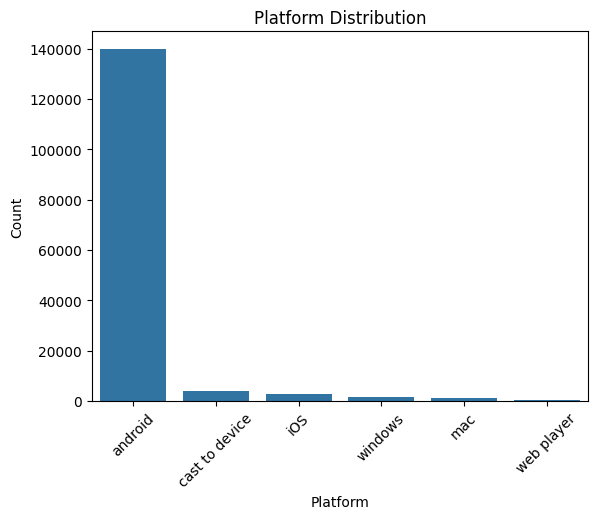

In [10]:
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
#reason to start distribution
reason_counts = data['reason_start'].value_counts()
print(reason_counts)

reason_start
trackdone     76599
fwdbtn        53785
clickrow      11224
appload        3729
backbtn        2204
playbtn        1458
remote          477
trackerror      120
unknown          23
nextbtn          21
popup             5
endplay           2
autoplay          1
Name: count, dtype: int64


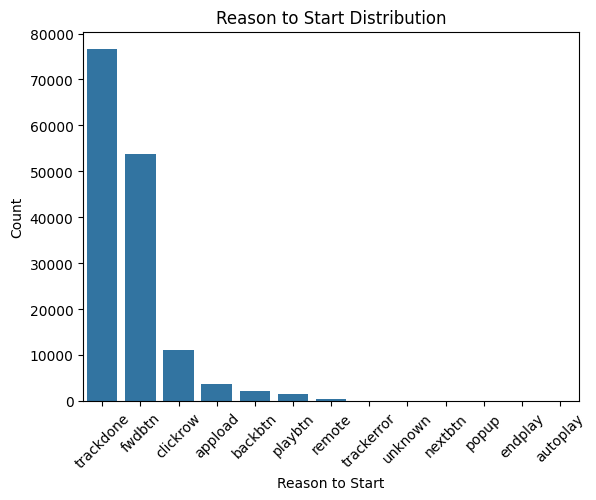

In [12]:
sns.barplot(x=reason_counts.index, y=reason_counts.values)
plt.title('Reason to Start Distribution')
plt.xlabel('Reason to Start')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

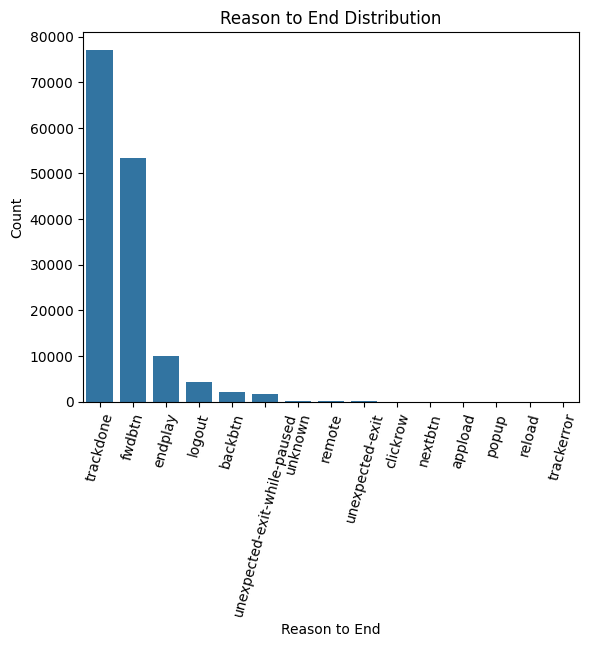

In [13]:
#reason to end distribution
reason_end_counts = data['reason_end'].value_counts()
sns.barplot(x=reason_end_counts.index, y=reason_end_counts.values)
plt.title('Reason to End Distribution')
plt.xlabel('Reason to End')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

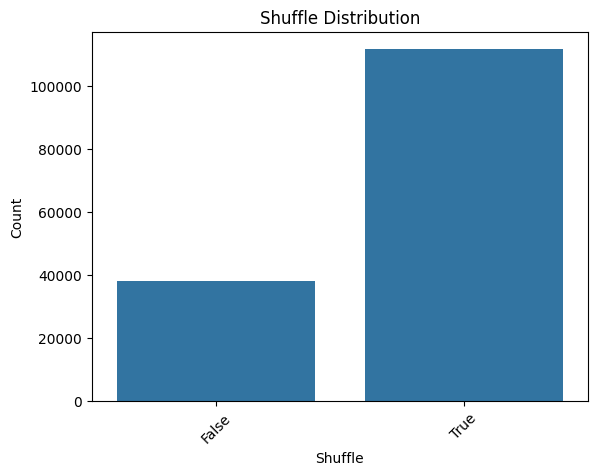

In [14]:
#shuffle distribution
shuffle_counts = data['shuffle'].value_counts()
sns.barplot(x=shuffle_counts.index, y=shuffle_counts.values)
plt.title('Shuffle Distribution')
plt.xlabel('Shuffle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

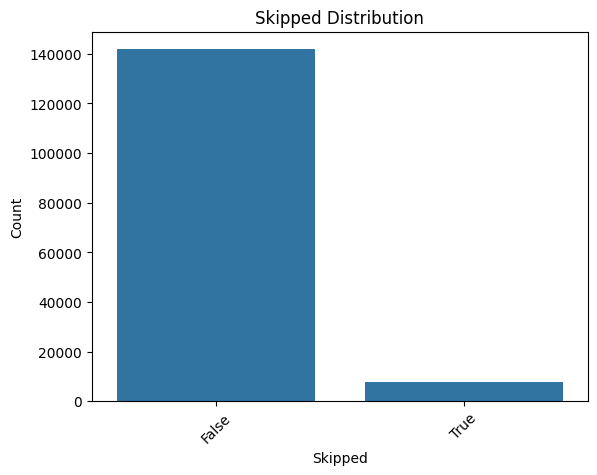

In [15]:
#skipped distribution
skipped_counts = data['skipped'].value_counts()
sns.barplot(x=skipped_counts.index, y=skipped_counts.values)
plt.title('Skipped Distribution')
plt.xlabel('Skipped')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

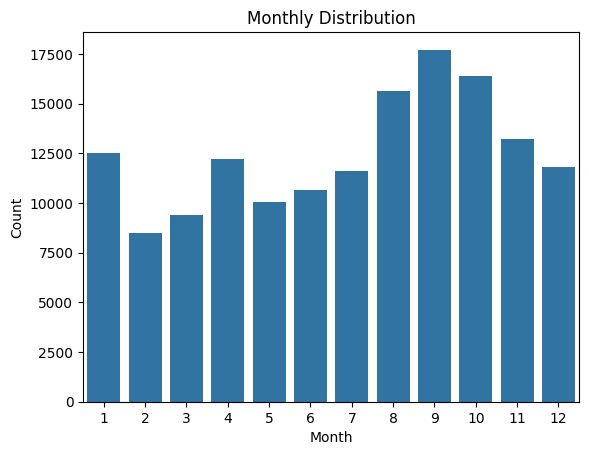

In [16]:
#monthly distribution
monthly_counts = data['month'].value_counts().sort_index()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Monthly Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


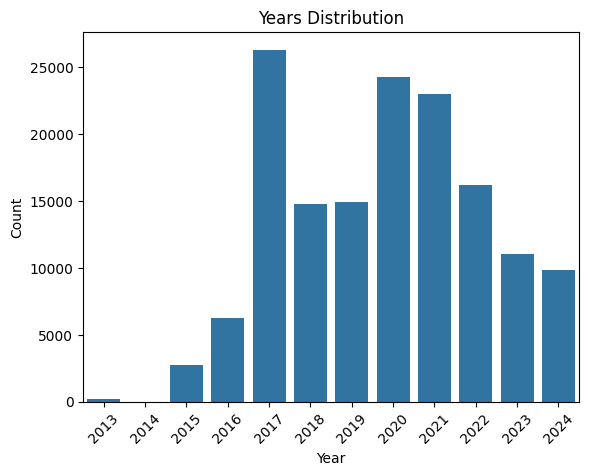

In [17]:
#years distribution
years_counts = data['year'].value_counts().sort_index()
sns.barplot(x=years_counts.index, y=years_counts.values)
plt.title('Years Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

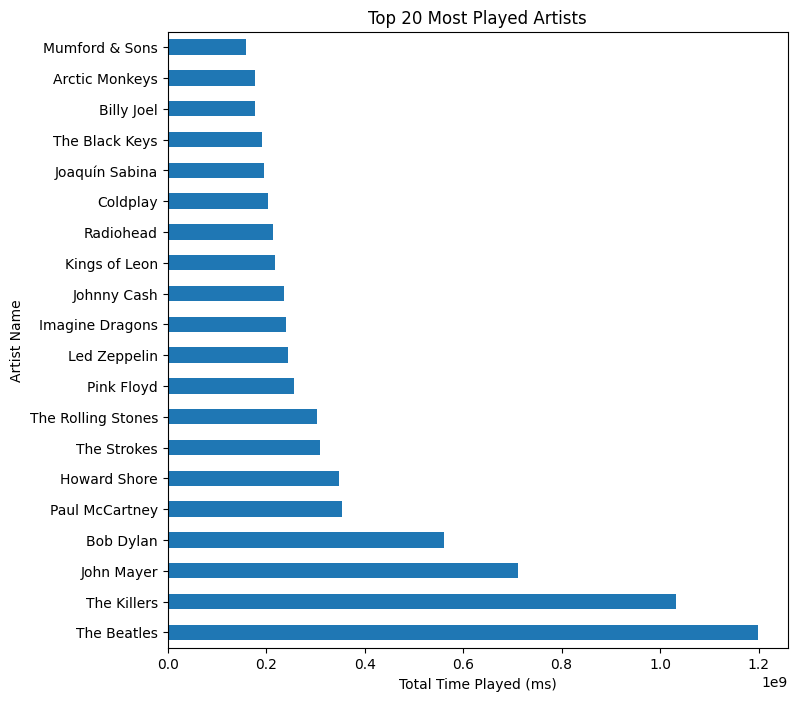

In [63]:

#plotting the top 20 artists
top_artists = data.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(20)
top_artists.plot(kind='barh', figsize=(8, 8))
plt.title('Top 20 Most Played Artists')
plt.ylabel('Artist Name')
plt.xlabel('Total Time Played (ms)')
plt.show()

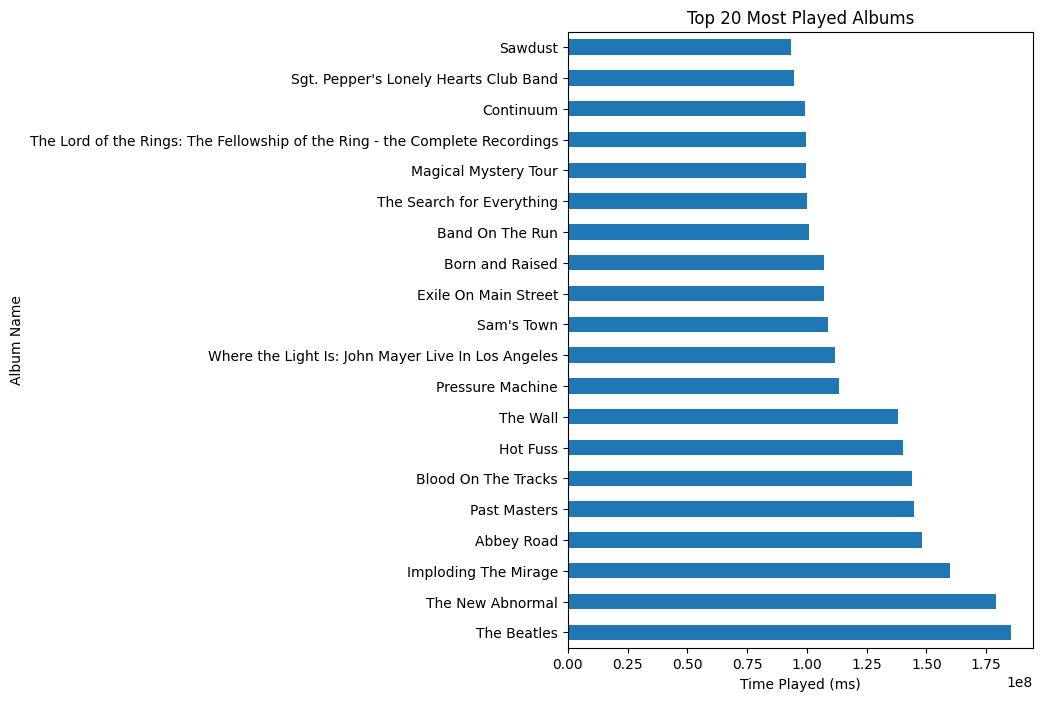

In [64]:
#top 20 albums
top_albums = data.groupby('album_name')['ms_played'].sum().sort_values(ascending=False).head(20)
top_albums.plot(kind='barh', figsize=(6,8))
plt.title('Top 20 Most Played Albums')
plt.ylabel('Album Name')
plt.xlabel('Time Played (ms)')
plt.show()

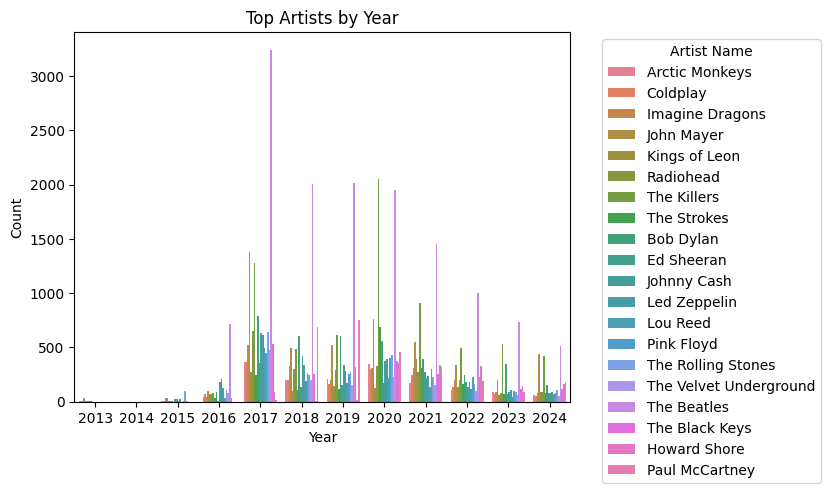

In [20]:
#artist name and  year distribution
artist_year_counts = data.groupby(['artist_name', 'year']).size().reset_index(name='count')
top_artists_years = artist_year_counts[artist_year_counts['artist_name'].isin(top_artists.index)]
sns.barplot(x='year', y='count', hue='artist_name', data=top_artists_years)
plt.title('Top Artists by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend(title='Artist Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

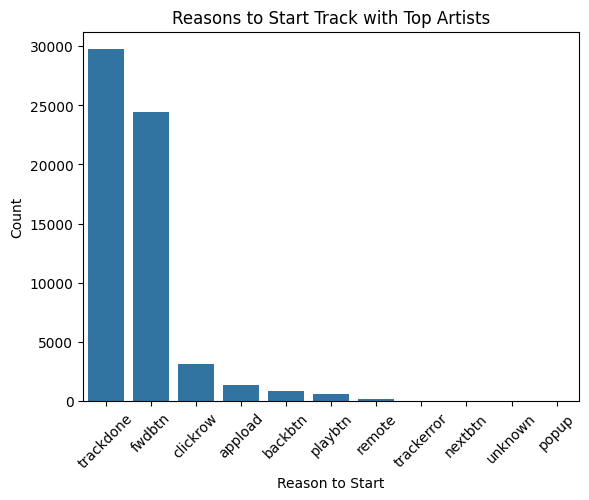

In [30]:
# top 20 artists and reason to start
top_artists
reason_artists_data = data[data['artist_name'].isin(top_artists.index)]
reason_to_start = reason_artists_data['reason_start'].value_counts().head(20)
# Plotting the reasons for starting with top artists
sns.barplot(x=reason_to_start.index, y=reason_to_start.values)
plt.title('Reasons to Start Track with Top Artists')
plt.xlabel('Reason to Start')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

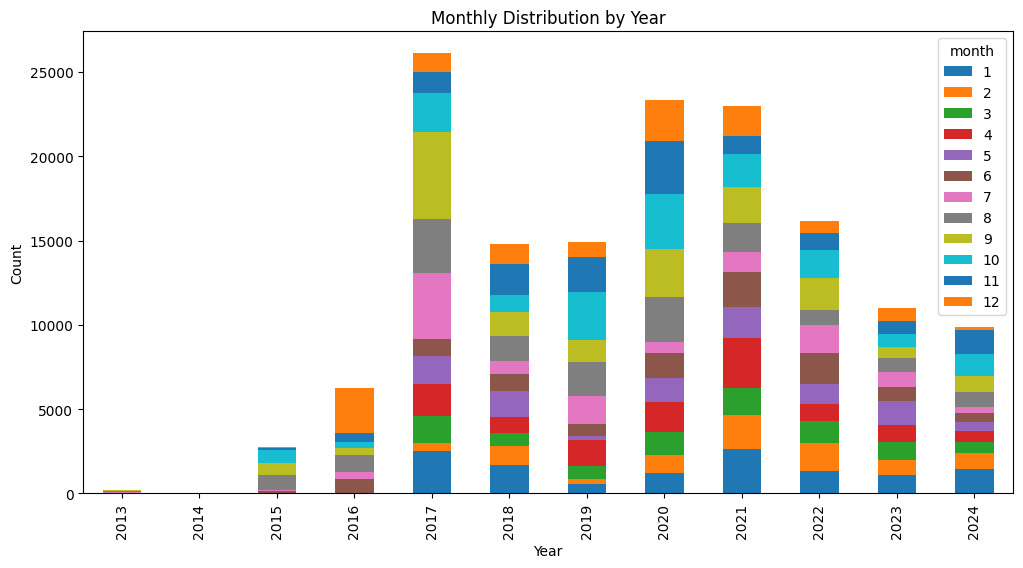

In [36]:
#monthly distribution by year
monthly_year_counts = data.groupby(['year', 'month']).size().unstack(fill_value=0)
monthly_year_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

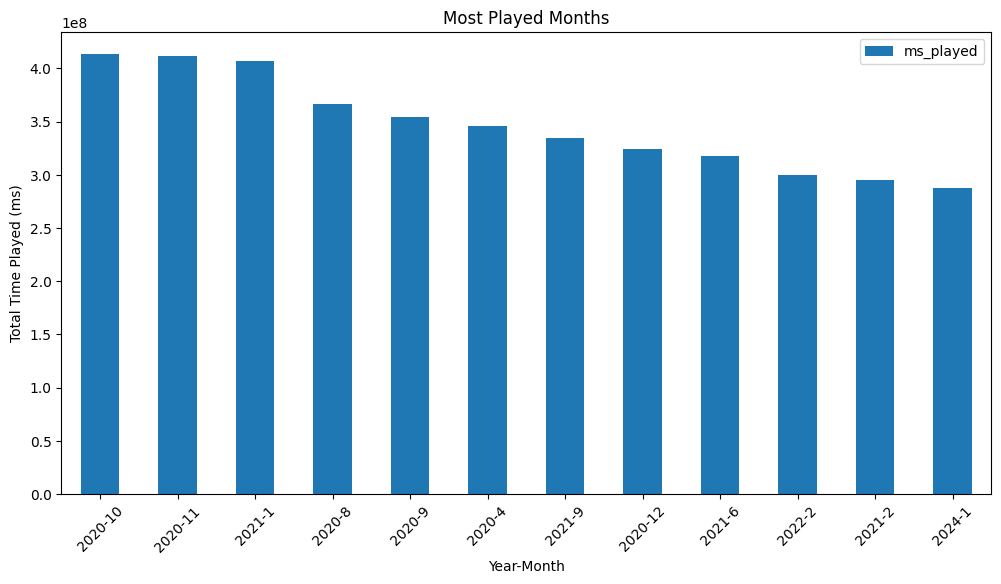

In [66]:
#most played months
most_played_months = data.groupby(['year', 'month'])['ms_played'].sum().reset_index()
most_played_months['month_year'] = most_played_months['year'].astype(str) + '-' + most_played_months['month'].astype(str)
most_played_months = most_played_months.sort_values(by='ms_played', ascending=False).head(12)
most_played_months.plot(x='month_year', y='ms_played', kind='bar', figsize=(12, 6))
plt.title('Most Played Months')
plt.xlabel('Year-Month')
plt.ylabel('Total Time Played (ms)')
plt.xticks(rotation=45)
plt.show()

## Conclusion

1. From the graphs, it can be seen that the user listens mostly to rock and pop based on the artists that get more playing time.

2. It is also observed that the user used an android device most. This can be assumed to be their phone.

3. The user streamed alot in 2020. This can be attributed to lockdown period, where people spent most of their time in the house.

4. The user doesn't skip most of his tracks and uses shuffle often. Most songs are played to the end, suggesting they like the song, or they've created playlist(s) of songs they like.